In this post, I will analyze Major Crime Indicators in Toronto in years from 2014 to 2018. I obtained the publicly available data set from the Toronto Police Service. First, I will visually inspect the crime scene in the City. Specifically, I will use the Matplot library to demonstrate the composition of assaults. Additionally, I will mark the most criminal neighborhoods on the map while utilizing both the `MarkerCluster` and `HeatMap` as `plugins` of folium package. Examining the criminal behavior on the map, shows the downtown as the area with the highest concentration of crime. On top of that, criminal neighborhoods can be easily clustered. Then, one can see that areas alongside the major routes exhibit high criminal activity as well.

In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import re #regular expression matching operations

import folium #maping crime on the map
from folium.plugins import HeatMap, MarkerCluster #making maping visually appealing

%matplotlib inline

## Loading Data

I downloaded the original csv file `MCI_2014_to_2018.csv`from http://data.torontopolice.on.ca/datasets/mci-2014-to-2018. I preprocessed the data and selected only the variables of my interest and saved the file as `toronto_crime.csv`.

In [3]:
crime = pd.read_csv('toronto_crime.csv')
crime = crime.drop(columns = "Unnamed: 0")

The original data set already breaks down the `occurrencedate` (yyy-MM-dd HH”T”:mm:ss.SSS’Z’) into marginal time categories, i.e. year, month, hour, etc. However, I wanted to show how easily Python and pandas can generate these variables from the string format.

In [4]:
crime["datetime"] = pd.to_datetime(crime["occurrencedate"])

crime['year'] = crime['datetime'].dt.year
crime['month'] = crime['datetime'].dt.month
crime['dayofweek'] = crime['datetime'].dt.dayofweek
crime['hour'] = crime['datetime'].dt.hour

In [5]:
crime["MCI"] = crime["MCI"].astype('category')

I am not presenting EDA of the date in this post. If you wish to see some of the methods I have used, I recommend you read my previous post on [**“Machine Learning and Diabetes”**](https://www.jiristodulka.com/post/machine/), where I disclose some of the frequently used commands.

# Crime Composition in Toronto

Technically, visualizing the crime composition in the City if Toronto was the most difficult part of my work. Initially, my aim was to make the following visualization of every `MCI`. However, as you can see in the following code, this would take a lot of space. Therefore, I have decided to focus only on: 
* Crime in general 
* Different categories of assault in offence.

Additionally, I wanted to share an appealing visualization rather than pie charts (I originally started with). I admit, I had a lot of fun while playing with the following code. **The whole objective with preprocessing data was to store values and labels separately in the same order**.

Therefore, the following section has three parts:
1.	Generating values and labels for Crimes
2.	Generating values and labels for Assaluts
3.	**Visualizing Crime and Assaults**

Since I am obsessed with writing neat and clean codes, or at least I always try my best, I wonder if you can come up with a more efficient solution? If so, can you kindly share it with me?

## 1. Values and Labels: Crime

Obtaining values and labels from crime was the easiest step and I do not think I need to explain the logic behind it. The process is as simple as "ask for values" and "ask for labels".

In [6]:
values_crime = crime["MCI"].value_counts() 
labels_crime = crime["MCI"].value_counts().keys()

## 2. Values and Labels: Assault

However, coming up with the values and labels for assaults was a different story and it took me a while before I came up with and realized the **Step 3.** .

* **Step 1:** I filtered for rows with any form of "ASSAULT" in `offence` variable. I called the filtered df `crime_assault`. You can notice that I specified the selection to be case insensitive by `flags=re.IGNORECASE`. 

* **Step 2:** I counted the values in `crime_assault`, i.e. "How many times each criminal act classified as assault appears in the data".

* **Step 3:** This step was actually not necessary. However, when you look at the chart below, you should notice the category `other`. In fact, it consolidates the other three types of assaults: *Peace Officer Wpn/Cbh, Force/Thrt/Impede, and Aggravated Assault Avails Pros in the range from 251 to 12. As you can see, the values are marginal (compared to Assaults of 62194). Since the categories were overlaying in the initial plot, I have decided to consolidate them. I iterated over the rows in `values_assault` with the aim to **rename** the key of the value in `offence` smaller than 1500. I had to save it as `pd.DataFrame` object because of the following step. 

* **Step 4:** Since the purpose of the whole procedure was to plot the data with labels and values, it was essential to store the values in the exact index order as the labels: `sort_values("offence",ascending=False)`. In this step, I was grouping the data according to `index`. It is because `values_assault` was originally a Series object. However, after I stored it as `pd.DataFrame` object, I had to use `index` because `key` is strictly associated with Series objects.

* **Step 5:** I saved the index values, i.e. the categories of assault, as strings.

**To wrap it up, the goal of these 5 steps was to store the values and labels separately in the same order to facilitate visualization.**


In [7]:
crime_assault = crime[crime["offence"].str.contains('ASSAULT', flags=re.IGNORECASE, regex=True)] #Step 1.

values_assault = crime_assault["offence"].value_counts() #Step 2.

for key,value in values_assault.iteritems(): #Step 3.
    if value < 1500:
       values_assault= pd.DataFrame(values_assault.rename({key: "other"}))


values_assault=values_assault.groupby(values_assault.index).sum().sort_values("offence",ascending=False) #Step 4.

labels_assault = values_assault.index #Step 5.

## Visualization

As I already said, I wanted to generate an appealing visualization. I took inspiration from **Kevin Amipara** and his article called [“A better visualization of Pie charts by MatPlotLib”](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f).

The only changes I have made was to i.) plotting the two plots in subplots, and ii.) adding the legends.

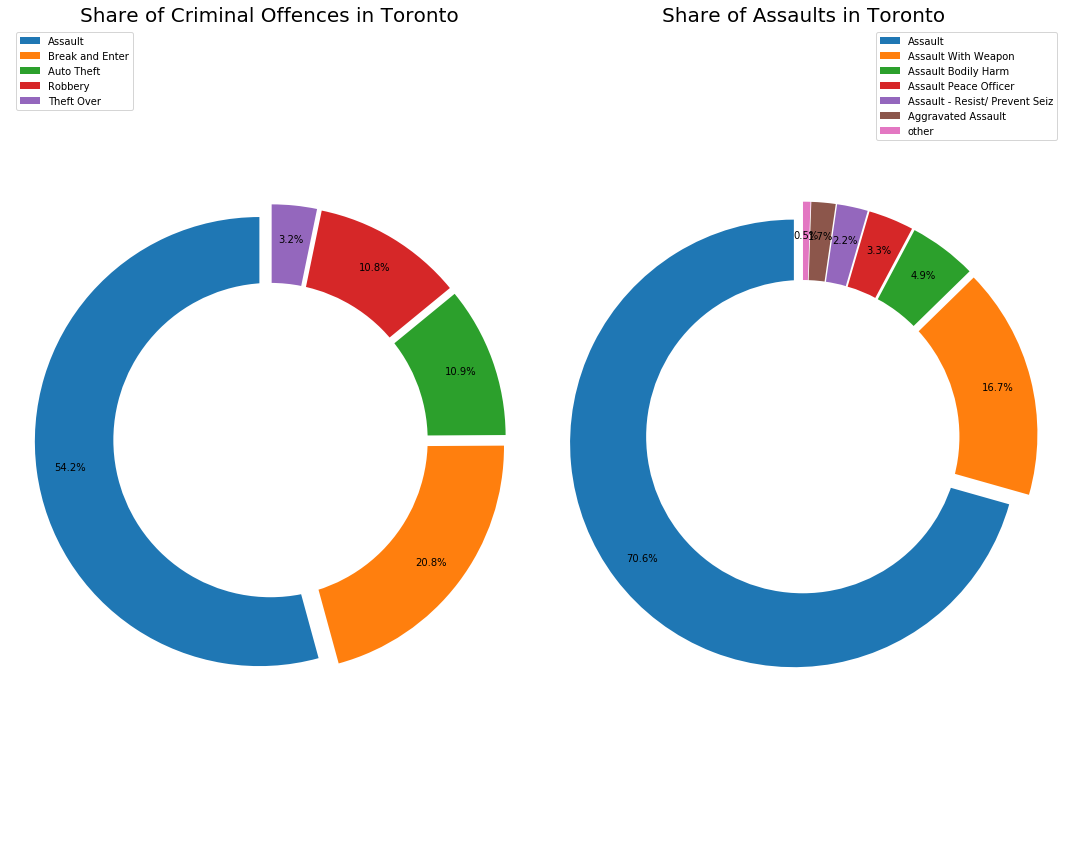

In [8]:
plt.figure(num=None, figsize=(15, 12))


##############################   Crime    ################################
plt.subplot(1,2,1)
plt.pie(values_crime, autopct='%1.1f%%', pctdistance=0.85, startangle=90, explode = [0.05]*labels_crime.shape[0])

    #draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

    #title+legend
plt.title("Share of Criminal Offences in Toronto",size=20)
plt.legend(labels_crime,loc=2)

    # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

##############################   Assault   ################################
plt.subplot(1,2,2)
plt.pie(values_assault, autopct='%1.1f%%',pctdistance=0.85, startangle=90, explode = [0.05]*labels_assault.shape[0])
    
    #draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

    #title+legend
plt.title("Share of Assaults in Toronto",size=20)
plt.legend(labels_assault,loc=1)

    # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()

plt.show()

As you can see from the left chart (Criminal Offences), Torontians experience assaults most of the time. Assaults represent over 50% of the criminal activity in the city. Furthermore, “Break and Enter” represents 21% of the activity.

Looking at the right plot (Assaults), you can infer more interesting facts. Firstly, 17% of the assaults are conducted with a weapon. Specifically, if you happened to be assaulted in Toronto, there is a 17% chance you were threaten by weapon. Unfortunately, I cannot infer the share of fire guns regarding these assaults. And according to “Assault Bodily Harm”, a person assaulted is 5% more likely to be bodily harmed.

## Mapping Crime

Since my family is visiting me soon from Europe, I was already concerned for their safety. I thought it would be effective to find places with high criminal density, so I can avoid them with my family. There are two ways in which you can do it: 
* 1. Utilize longitude and latitude coordinates as axis 
* 2. Use a model (e.g.f`folium`) and plot crime on a map

### Longitude and Latitude on x and y Axis
This is the easiest method of how to inspect criminality in the map. Simply put, `Long` and `Lat` are nothing but the coordinates. Given the high density of crime in the last four years, plotting crimes on a scatter plot should form a coherent map of the City of Toronto. Notice that I played with the arguments in `plt.scatter()`. The density was so high that I had to reduce dot sizes and decrease transparency as much as possible. The process required some trial and error method. Consequentially, one can infer several things from such simple mapping.

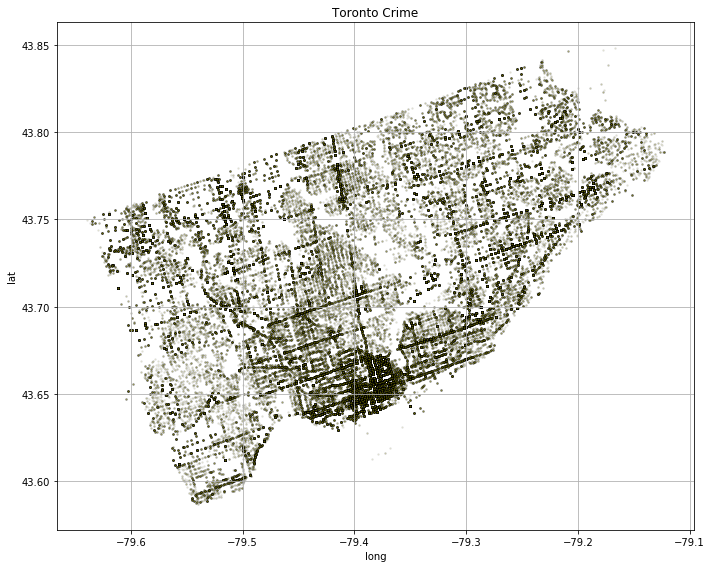

In [9]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Long", "Lat", data = crime, c = 'y',alpha = 0.1, edgecolor = 'black', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Toronto Crime')
plt.tight_layout()
plt.axis('tight')

plt.show()

Firstly, there are a few high-density areas on the map. The most evident one is in the south of the City – downtown. The neighborhoods around also exhibit high criminal activity and there are also other spots suggesting criminal neighborhoods can be clustered. Contrary, the white spots are green - park - areas.
You can also infer that crime appears mostly alongside the major roads. Technically, you can observe every major street, avenue, and road in the City. Additionally, you can clearly see, the Young Street heading North from Downtown. Did you also know that Young St. is said to be the longest street in the world? Remember, these are just dots in the scatter plot.

## Neighborhoods You Should avoid in Toronto

The following section supports my previous statement that criminal neighborhoods can be clustered. In the following code, I grouped the data by `Neighbourhood` (with 141 discrete values), and counted `MCI` in each district, i.e. `top_N`.

Then, I dropped the duplicates in `Neighbourhood` in `crime`, and got `Long` and `Lat` coordinates. I joined the data with `top_N`. As a result, I obtained the `map_data` DataFrame object, where each row (with `Neighbourhood` index) records `Lat`, `Lon`, and `MCI` accordingly.

In [10]:
# Top N Criminal Neighbourhoods in Toronto 
top_N = crime.groupby('Neighbourhood')[['MCI']].count().sort_values(by=['MCI'])


# Coordinates Criminal Neighbourhoods
map_data = crime[['Neighbourhood', 'Lat', 'Long']].drop_duplicates('Neighbourhood').set_index('Neighbourhood') \
    .join(top_N, how='inner')

See the most criminal neighborhoods in Toronto bellow:

In [11]:
map_data.sort_values(by=['MCI'], ascending=False).head(10)

,Lat,Long,MCI
Neighbourhood,,,
Church-Yonge Corridor (75),43.663906,-79.384155,6301
Waterfront Communities-The Island (77),43.644955,-79.397644,5674
West Humber-Clairville (1),43.743992,-79.598869,4338
Moss Park (73),43.657307,-79.373459,3609
Bay Street Corridor (76),43.658077,-79.384712,3564
Kensington-Chinatown (78),43.650070,-79.396881,3263
Woburn (137),43.777592,-79.226578,3158
York University Heights (27),43.774353,-79.499802,3141
Downsview-Roding-CFB (26),43.733581,-79.483727,2974


Finally, I could use `map_data` DataFrame alongside with `folium` and visualize criminality in neighborhoods as clusters with the heatmap.

The process follows a certain logic:
1. create a Map (`m`) with using longitude and latitude of the place of your interest.
2. if you want to add a marker or other feature from `folium.plugins`, generate the object and use `add_to(M)` where M usually represents `folium.Map()` object or other module, e.g. `HeatMap()`


* Step 1: Creating & adding clustering functionality, i.e. `MarkerCluster()`, to the map (`m`).
* Step 2: Creating & adding `Marker` for every row, i.e. neighborhood, based on `Long` and `Lat` to the cluster (`cluster`).
* Step 3: Creating & adding `HeatMap`to the map (`m`).





Finally, I could use `map_data` DataFrame along with `folium` and visualize criminality in the neighborhoods as clusters within the heatmap.

The process follows a certain logic: 
1. Create a Map (`m`) with using longitude and latitude of the place of your interest. 
2. If you want to add a marker or another feature from `folium.plugins`, generate the object and use `add_to(M)` where M usually represents `folium.Map()` object or other module, e.g. `HeatMap()`

*	Step 1: Creating & adding clustering functionality, i.e. `MarkerCluster()`, to the map (`m`).
*	Step 2: Creating & adding Marker for every row, i.e. neighborhood, based on Long and Lat to the cluster (`cluster`).
*	Step 3: Creating & adding `HeatMap` to the map (`m`).

In [14]:
# Mapping Criminal Neighbourhoods
m = folium.Map(
    location=[43.702270, -79.366074],
    zoom_start=11
)

#Step 1: Clusters
cluster = MarkerCluster().add_to(m)

#Step 2: Clusters breaking into Markers
for x in map_data.iterrows():
    folium.Marker([x[1].Lat, x[1].Long]).add_to(cluster)
    
#Step 3: Heat
max_crime = map_data['MCI'].max() # max value as reference for the darkets shade

heat = HeatMap(map_data.values,
                min_opacity=0.2,
                max_val=max_crime,
                radius=30, blur=20, 
                max_zoom=11)

heat.add_to(m)

m # call m to see the heat map with clusters

Consequently, I created both visually appealing and interactive map of the most dense criminal places in the city. It is possible to click on any cluster and zoom in and out to see places that you might want to avoid.